In [1]:
#Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.utils import resample

from scipy.stats import norm, skew #for some statistics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Let's load the train and test datasets into pandas Dataframe
train = pd.read_csv("train.csv")
output = pd.read_csv("test.csv")

In [3]:
#Display first five rows of the train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Display first five rows of the test dataset
output.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#check the dimensions of the train and test datasets
print("The number of Observations and Features in train data : {} ".format(train.shape))
print("The number of Observations and Features in test data : {} ".format(output.shape))

The number of Observations and Features in train data : (1460, 81) 
The number of Observations and Features in test data : (1459, 80) 


The Train dataset consists of 81 features because it has one extra feature which is the target variable whereas the Test dataset has 80 features where we need to predict and add the response variable.

In [6]:
#Let's check for the duplicate records
UniqueIds = len(set(train.Id))
TotalIds = train.shape[0]
duplicateIds = TotalIds - UniqueIds
print(duplicateIds)

0


In [7]:
#Let's check for the duplicate records
UniqueIds = len(set(output.Id))
TotalIds = output.shape[0]
duplicateIds = TotalIds - UniqueIds
print(duplicateIds)

0


So, there are no duplicate records in the entire train and test dataset.

We will drop the ID feature from both train and test data as it is just a sequence of numbers not carrying any information responsible in predicting.

In [8]:
#Dropping the ID column
train.drop("Id", axis = 1, inplace = True)
output.drop("Id", axis = 1, inplace = True)

print("The number of Observations and Features in train data after dropping ID feature : {} ".format(train.shape))
print("The number of Observations and Features in test data after dropping ID feature : {} ".format(output.shape))

The number of Observations and Features in train data after dropping ID feature : (1460, 80) 
The number of Observations and Features in test data after dropping ID feature : (1459, 79) 


Before performing any feature analysis and engineering, we will split the train data into 80% on which we train the model and 20% on which we validate the model to avoid any kind of bias.

Splitting the data using bootstrap sampling

In [9]:
nrows = train.shape[0]

In [10]:
all_indices = list(range(nrows))

In [11]:
train_indices = resample(all_indices, replace=True, n_samples=int(0.8*nrows), random_state=123)

In [12]:
len(train_indices)

1168

In [13]:
test_indices = [index for index in list(range(nrows)) if index not in train_indices]

In [14]:
train_df = train.take(train_indices)

In [15]:
test_df = train.take(test_indices)

In [16]:
X_train = train_df.drop("SalePrice", axis=1)

In [17]:
Y_train = train_df['SalePrice']

In [18]:
X_test = test_df.drop("SalePrice", axis=1)

In [19]:
Y_test = test_df['SalePrice']

In [20]:
# 80% Train data
train_df = pd.concat([X_train, Y_train],axis = 1)
train_df.shape

(1168, 80)

In [21]:
#20% test data
test_df = pd.concat([X_test,Y_test],axis=1)
test_df.shape

(675, 80)

Reindexing the Splits for the ease of joining and splitting them again while modelling

In [22]:
train_df.index = range(len(train_df))

In [23]:
test_df.index = range(1168,1168+len(test_df))

In [24]:
output.index = range(1843, 1843+len(output))

In [25]:
final_data = pd.concat([train_df,test_df],axis=0)

In [26]:
final_data.shape

(1843, 80)

#### So, now we train the model using "train_df" dataset and validate using the "test_df" dataset

### Missing Value Treatment

For Train data

In [27]:
Missing_values = train_df.isnull().sum().sort_values(ascending=False)
percentage = ( train_df.isnull().sum()/ train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Missing_values, percentage], axis=1, keys=['Missing Values', 'Percentage'])
missing_data

,Missing Values,Percentage
PoolQC,1162,0.994863
MiscFeature,1114,0.953767
Alley,1087,0.930651
Fence,952,0.815068
FireplaceQu,578,0.494863
LotFrontage,198,0.169521
GarageType,62,0.053082
GarageCond,62,0.053082
GarageFinish,62,0.053082
GarageQual,62,0.053082


If there are more missing values for a particular feature, we drop that feature because it doesn't carry much information Which is required to predict the target value. So, we will not consider those variables having more than 40% of missing values keeping 40% as a threshold.

Keeping that in mind, there is a set of variables for ex: 'PoolQC', 'MiscFeature', 'Alley', etc., that we should delete. Also, None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house, maybe that's the reason why the data is missing. 

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, in our trial analysis we found that they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Imputing 'BsmtX' Variables, Since the missing value count is very less for these features we simply replace them with mode


In [28]:
train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0], inplace=True)
train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0], inplace=True)
train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0], inplace=True)
train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0], inplace=True)
train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0], inplace=True)

Imputing 'GarageX' Variables and 'LotFrontage',Since the missing value count is very less for these features we simply replace them with mode and median.

In [29]:
train_df['GarageType'].fillna(train_df['GarageType'].mode()[0], inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mode()[0], inplace=True)
train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0], inplace=True)
train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0], inplace=True)
train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0], inplace=True)
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())

In [30]:
train_df = train_df.drop(['MasVnrArea', 'MasVnrType', 'PoolQC', 'MiscFeature','Alley', 'Fence','FireplaceQu'], axis = 1)


#Checking for null values after the data is updated.
train_df.isnull().any().sum()

0

For Test Data

In [31]:
Missing_values = test_df.isnull().sum().sort_values(ascending=False)
percentage = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Missing_values, percentage], axis=1, keys=['Missing Values', 'Percentage'])
missing_data

,Missing Values,Percentage
PoolQC,673,0.997037
MiscFeature,651,0.964444
Alley,638,0.945185
Fence,540,0.800000
FireplaceQu,306,0.453333
LotFrontage,128,0.189630
GarageType,45,0.066667
GarageFinish,45,0.066667
GarageQual,45,0.066667
GarageCond,45,0.066667


So, we see that the pattern of missing values is the same as train dataset. So, we apply the same missing value treatment for test data as well.
Imputing 'BsmtX' Variables, Since the missing value count is very less for these features we simply replace them with mode

In [32]:
test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0], inplace=True)
test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0], inplace=True)
test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0], inplace=True)
test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0], inplace=True)
test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0], inplace=True)

Imputing 'GarageX' Variables and 'LotFrontage',Since the missing value count is very less for these features we simply replace them with mode and median.

In [33]:
test_df['GarageType'].fillna(test_df['GarageType'].mode()[0], inplace=True)
test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mode()[0], inplace=True)
test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0], inplace=True)
test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0], inplace=True)
test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0], inplace=True)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())

So, Finally we drop those variable we decide to delete and update the Dataset.

In [34]:
test_df = test_df.drop(['MasVnrArea', 'MasVnrType', 'PoolQC', 'MiscFeature','Alley', 'Fence','FireplaceQu'], axis = 1)


In [35]:
#Checking for null values after the data is updated.
test_df.isnull().any().sum()

0

Checking the missing Values for Output data

In [36]:
#Checking for any missing values
Missing_values = output.isnull().sum().sort_values(ascending=False)
percentage = ( output.isnull().sum()/ output.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Missing_values, percentage], axis=1, keys=['Missing Values', 'Percentage'])
missing_data

,Missing Values,Percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageQual,78,0.053461


We used Median to impute Numerical features and Mode for Categorical Features.

In [37]:
output['BsmtQual'].fillna(output['BsmtQual'].mode()[0], inplace=True)
output['BsmtCond'].fillna(output['BsmtCond'].mode()[0], inplace=True)
output['BsmtExposure'].fillna(output['BsmtExposure'].mode()[0], inplace=True)
output['BsmtFinType1'].fillna(output['BsmtFinType1'].mode()[0], inplace=True)
output['BsmtFinType2'].fillna(output['BsmtFinType2'].mode()[0], inplace=True)

In [38]:
output['GarageType'].fillna(output['GarageType'].mode()[0], inplace=True)
output['GarageYrBlt'].fillna(output['GarageYrBlt'].mode()[0], inplace=True)
output['GarageFinish'].fillna(output['GarageFinish'].mode()[0], inplace=True)
output['GarageQual'].fillna(output['GarageQual'].mode()[0], inplace=True)
output['GarageCond'].fillna(output['GarageCond'].mode()[0], inplace=True)
output['LotFrontage'] = output['LotFrontage'].fillna(output['LotFrontage'].median())
output['MSZoning'].fillna(output['MSZoning'].mode()[0], inplace=True)
output['Electrical'].fillna(output['Electrical'].mode()[0], inplace=True)
output['BsmtHalfBath'].fillna(output['BsmtHalfBath'].mode()[0], inplace=True)
output['BsmtFullBath'].fillna(output['BsmtFullBath'].mode()[0], inplace=True)
output['BsmtFinSF1'].fillna(output['BsmtFinSF1'].mode()[0], inplace=True)
output['BsmtFinSF2'].fillna(output['BsmtFinSF2'].mode()[0], inplace=True)
output['TotalBsmtSF'] = output['TotalBsmtSF'].fillna(output['LotFrontage'].median())
output['BsmtUnfSF'] = output['BsmtUnfSF'].fillna(output['BsmtUnfSF'].median())
output['SaleType'].fillna(output['SaleType'].mode()[0], inplace=True)
output['Utilities'].fillna(output['Utilities'].mode()[0], inplace=True)
output['Functional'].fillna(output['Functional'].mode()[0], inplace=True)
output['Exterior2nd'].fillna(output['Exterior2nd'].mode()[0], inplace=True)
output['Exterior1st'].fillna(output['Exterior1st'].mode()[0], inplace=True)
output['GarageArea'] = output['GarageArea'].fillna(output['GarageArea'].median())
output['GarageCars'].fillna(output['GarageCars'].mode()[0], inplace=True)
output['KitchenQual'].fillna(output['KitchenQual'].mode()[0], inplace=True)

In [39]:
output = output.drop(['MasVnrArea', 'MasVnrType', 'PoolQC', 'MiscFeature','Alley', 'Fence','FireplaceQu'], axis = 1)



In [40]:
#Checking for null values after the data is updated.
output.isnull().any().sum()

0

Output data is not added to final data here as the target variable in output data is missing. Output data will be added while creating Dummies.

In [41]:
final_data = pd.concat([train_df,test_df],axis=0)

So, We imputed the missing Values. Now, We check for the Outliers in the data by checking the Scatter Plots. Scatter Plots help us giving the relationship between the features along with identifying outliers. 

We will delete the Outliers from both Train and test datasets and then we concatenate them.

Ground Living Area(GrLivArea) feature has 2 outliers. (Mentioned in the documentation provided with the data).
We identified those 2 outliers and deleted them.

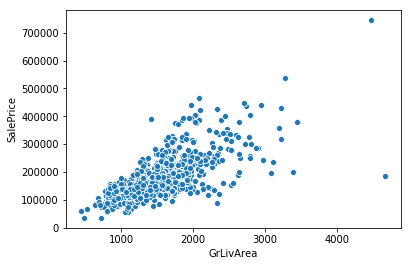

In [42]:
sns.scatterplot(train_df['GrLivArea'],train_df['SalePrice'])

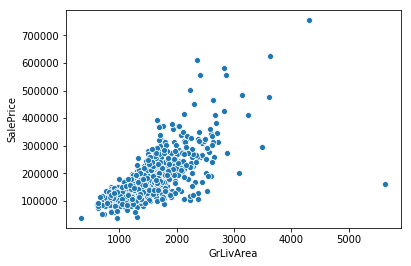

In [43]:
sns.scatterplot(test_df['GrLivArea'],test_df['SalePrice'])

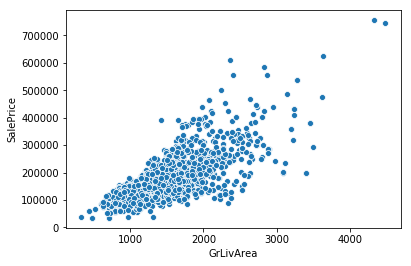

In [44]:
#Deleting Outliers
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)
test_df = test_df.drop(test_df[(test_df['GrLivArea']>4000) & (test_df['SalePrice']<300000)].index)
final_data = pd.concat([train_df,test_df],axis=0)

#Let's have a look at the relationship between SalePrice and GrLivArea Again
sns.scatterplot(final_data['GrLivArea'], final_data['SalePrice'])
plt.show()

### Correlation Matrix as a Heatmap

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

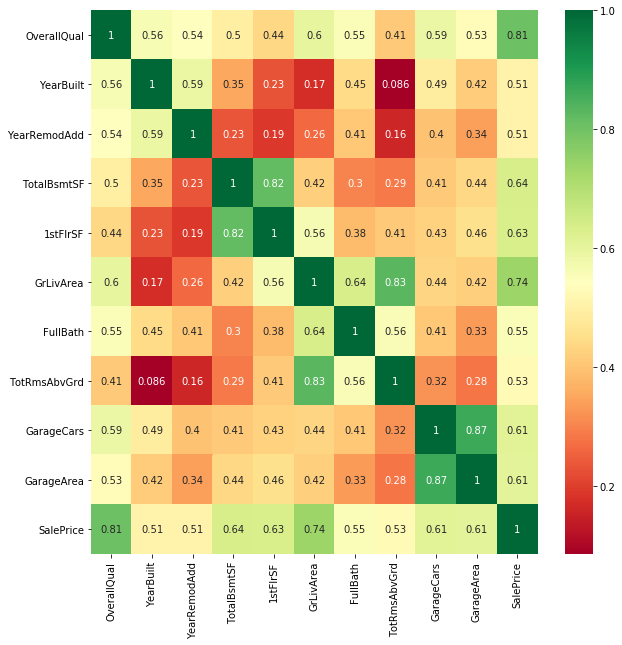

In [45]:
#Most correlated features, Considering the threshold as above 0.5
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Observations

1.'OverallQual', 'GrLivArea' and 'TotalBsmtSF','1stFlrSF' are more strongly correlated with 'SalePrice'. 

2.'GarageCars' and 'GarageArea' are also some of the most strongly correlated independent variables. This is because the number of cars that fit into the garage is a consequence of the garage area. Therefore, we just need one of these variables in our analysis. we can keep either 'GarageCars' ot'GarageArea in our dataset.

3.'TotalBsmtSF' and '1stFlrSF' also seem to be one of the most strongly correlated variables. We can keep 'TotalBsmtSF' since its correlation with 'SalePrice' is higher.

4.'TotRmsAbvGrd' and 'GrLivArea', also seem to be one of the most strongly correlated variables. Therefore, we just need one of these variables in our analysis. we can keep 'GrLivArea' since its correlation with 'SalePrice' is higher.

5.'YearRemodAdd','YearBuilt' and 'FullBath' are moderately correlated with SalePrice.


So, we drop one of those features which are highly correlated with the other features.



In [46]:
train_df = train_df.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'],axis=1)
test_df = test_df.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'],axis=1)
output = output.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'],axis=1)
final_data = pd.concat([train_df,test_df],axis=0)

We will further check if there are any highly correlation features 

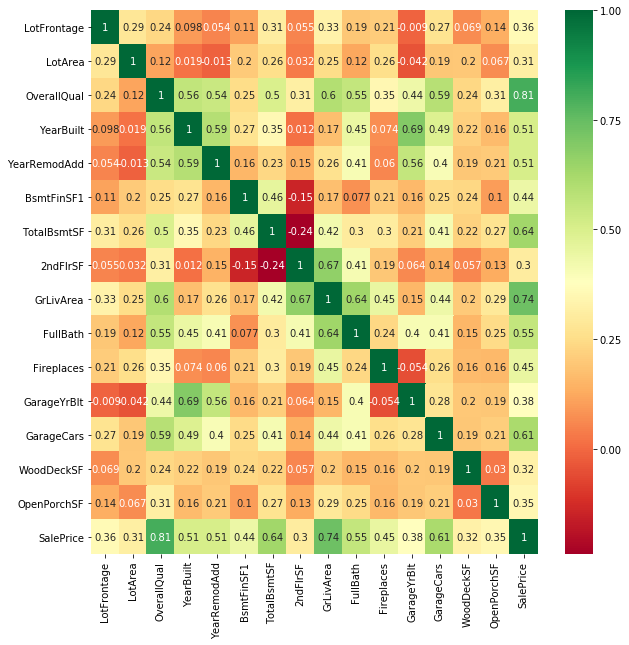

In [47]:
#Most correlated features, Considering the threshold as above 0.3
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.3]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

'YearBuilt','GarageYrBlt'  and 'GrLivArea','FullBath' and 'GrLivArea', '2ndFlrSF' are the most highly correlated Variables.

Since GarageYrBlt, 2ndFlrSF and FullBath are the less correlated features with the target variables, we drop those varaibles.


In [48]:
train_df = train_df.drop(['GarageYrBlt','FullBath','2ndFlrSF'],axis=1)
test_df = test_df.drop(['GarageYrBlt','FullBath','2ndFlrSF'],axis=1)
output = output.drop(['GarageYrBlt','FullBath','2ndFlrSF'],axis=1)
final_data = pd.concat([train_df,test_df],axis=0)

We are done with feature analysis and engineering, we will proceed with feature selection.

### Feature Selection

As there are more number of Variables, We use Random Forest Regressor for feature selection.

First we will perform one hot encoding for categorical features

In [49]:
final_data = pd.concat([train_df, test_df, output], axis = 0)

In [50]:
#gives the list of categorical features in the total dataset
Categorical_features = final_data.select_dtypes(include=['object']).columns
Categorical_features

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'Neighborhood',
       'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
       'Street', 'Utilities'],
      dtype='object')

In [51]:
final_cat = final_data[['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'Neighborhood',
       'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
       'Street', 'Utilities']]

In [52]:
#create Dummies
final_cat= pd.get_dummies(final_cat, drop_first=True)

In [53]:
#gives the list of numerical features in the total dataset
Numerical_features = final_data.select_dtypes(exclude=['object']).columns
Numerical_features

Index(['3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces',
       'GarageCars', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'YrSold'],
      dtype='object')

In [54]:
final_num = final_data[['3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',
       'Fireplaces', 'GarageCars', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold']]

In [55]:
final_data = pd.concat([final_cat,final_num],axis =1)

In [56]:
train_df.shape

(1167, 67)

In [57]:
train_df = final_data[0:1167]

In [58]:
test_df = final_data[1167:1167+674]

In [59]:
output = final_data[1841:1841+len(final_data)]

Now, We have our train_df and test_df datasets with Dummy features

Fitting RandomForestRegressor model for Feature Selection.

In [60]:
#Import Library
from sklearn.ensemble import RandomForestRegressor

In [61]:
model2 = RandomForestRegressor(random_state=9, max_depth=20)


model2.fit(train_df.drop('SalePrice',axis=1),train_df['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=9, verbose=0, warm_start=False)

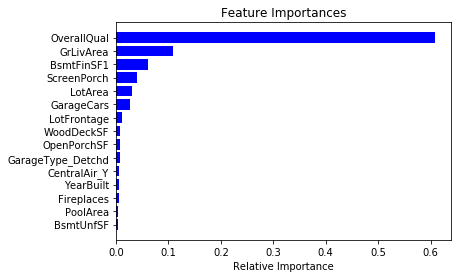

In [62]:
features2 = train_df.columns
importances2 = model2.feature_importances_
indices2 = np.argsort(importances2)[-15:]  # top 15 features
plt.title('Feature Importances')
plt.barh(range(len(indices2)), importances2[indices2], color='b', align='center')
plt.yticks(range(len(indices2)), [features2[i] for i in indices2])
plt.xlabel('Relative Importance')
plt.show()

Now, We will pick Two variables which contribute most of the information in predicting the target variable. Also, ScreenPorch is very little correlated with the target variable i.e., 0.127. we can also see that two features of our choice are the ones having high correlation with SalePrice from the correlation plot.

We again plot the Correlation matrix and see if we find any unusualities.

In [63]:
#Final choice of features for Multiple Linear Regression
Lr_data_train = train_df[['OverallQual','GrLivArea','SalePrice']]
Lr_data_test = test_df[['OverallQual','GrLivArea','SalePrice']]
Lr_data_train.corr()

,OverallQual,GrLivArea,SalePrice
OverallQual,1.000000,0.597616,0.805311
GrLivArea,0.597616,1.000000,0.736457
SalePrice,0.805311,0.736457,1.000000


Since, none of the pairs of the variables are highly correlated we may not expect the multicollinearity problem.

### Univariate Study

Check the Skewness of the features

#### Normality :

When we talk about normality what we mean is that the data should look like a normal distribution.

Let's understand the distribution of our target variable.


 mu = 178541.10 and sigma = 75612.26



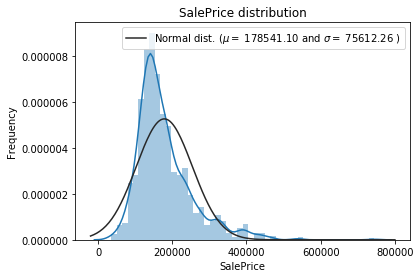

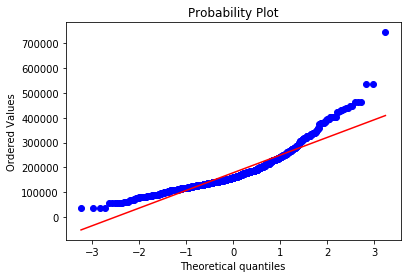

In [64]:
#Plot the distribution again
sns.distplot(Lr_data_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Lr_data_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Probability plot
fig = plt.figure()
res = stats.probplot(Lr_data_train['SalePrice'], plot=plt)
plt.show()

In [65]:
#Log - Transformation of the target variable
Lr_data_train["SalePrice"] = np.log1p(Lr_data_train["SalePrice"])


 mu = 12.01 and sigma = 0.39



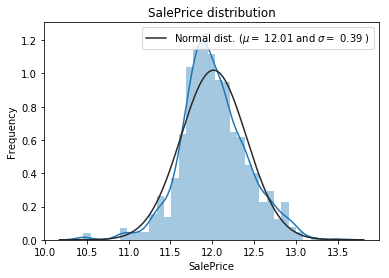

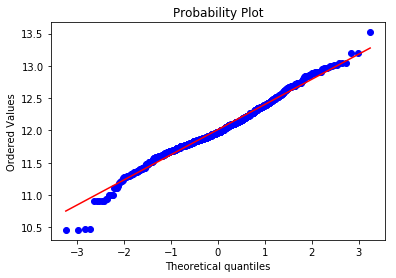

In [66]:
#Plot the distribution again
sns.distplot(Lr_data_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Lr_data_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Probability plot
fig = plt.figure()
res = stats.probplot(Lr_data_train['SalePrice'], plot=plt)
plt.show()

Let's check the Distribution of GrLivArea


 mu = 1502.16 and sigma = 504.19



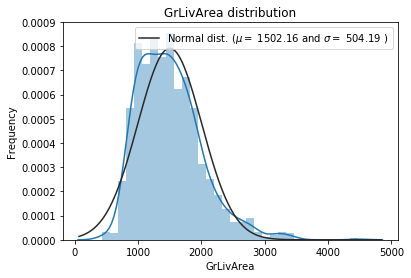

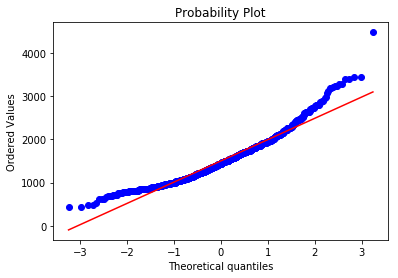

In [67]:
#Plot the distribution again
sns.distplot(Lr_data_train['GrLivArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Lr_data_train['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GrLivArea distribution')

#Probability plot
fig = plt.figure()
res = stats.probplot(Lr_data_train['GrLivArea'], plot=plt)
plt.show()

In [68]:
#Log - Transformation 
Lr_data_train["GrLivArea"] = np.log1p(Lr_data_train["GrLivArea"])


 mu = 7.26 and sigma = 0.33



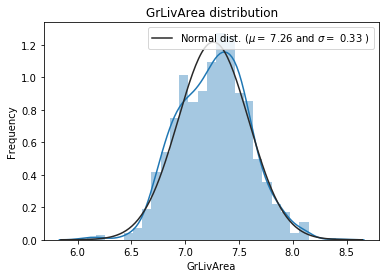

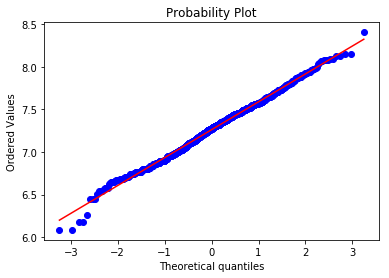

In [69]:
#Plot the distribution again
sns.distplot(Lr_data_train['GrLivArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Lr_data_train['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GrLivArea distribution')

#Probability plot
fig = plt.figure()
res = stats.probplot(Lr_data_train['GrLivArea'], plot=plt)
plt.show()

Check for test data


 mu = 184093.23 and sigma = 83748.16



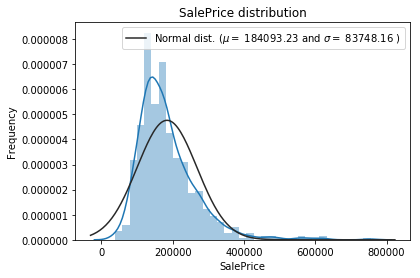

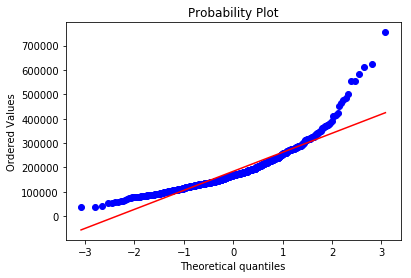

In [70]:
#Plot the distribution again
sns.distplot(Lr_data_test['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Lr_data_test['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Probability plot
fig = plt.figure()
res = stats.probplot(Lr_data_test['SalePrice'], plot=plt)
plt.show()

In [71]:
#Log - Transformation of the target variable
Lr_data_test["SalePrice"] = np.log1p(Lr_data_test["SalePrice"])


 mu = 12.04 and sigma = 0.41



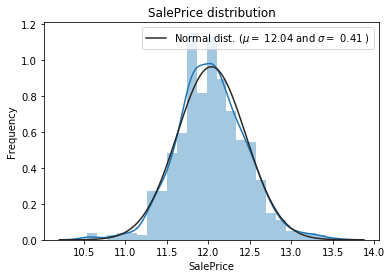

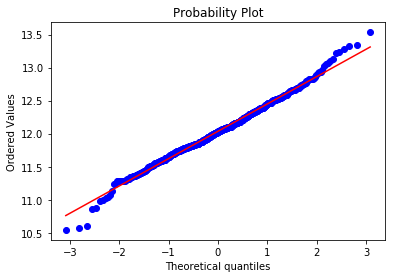

In [72]:
#Plot the distribution again
sns.distplot(Lr_data_test['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Lr_data_test['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Probability plot
fig = plt.figure()
res = stats.probplot(Lr_data_test['SalePrice'], plot=plt)
plt.show()

Let's check the distribution of GrLivArea


 mu = 1528.08 and sigma = 513.77



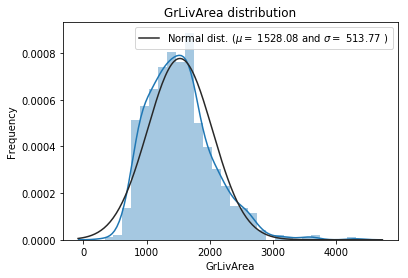

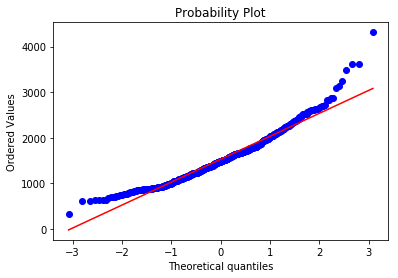

In [73]:
#Plot the distribution again
sns.distplot(Lr_data_test['GrLivArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Lr_data_test['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GrLivArea distribution')

#Probability plot
fig = plt.figure()
res = stats.probplot(Lr_data_test['GrLivArea'], plot=plt)
plt.show()

In [74]:
#Log - Transformation 
Lr_data_test["GrLivArea"] = np.log1p(Lr_data_test["GrLivArea"])


 mu = 7.28 and sigma = 0.33



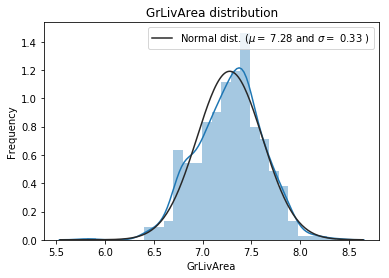

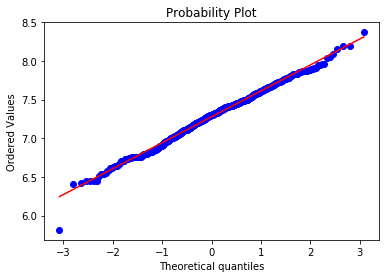

In [75]:
#Plot the distribution again
sns.distplot(Lr_data_test['GrLivArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Lr_data_test['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GrLivArea distribution')

#Probability plot
fig = plt.figure()
res = stats.probplot(Lr_data_test['GrLivArea'], plot=plt)
plt.show()

#### Linearity:

This is one of the Assumptions of Linear Regression. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X is constant, regardless of the value of X. An additive relationship suggests that the effect of X on Y is independent of other variables.

### Multivariate Study

Relationship between GrLivArea and SalePrice

Text(0,0.5,'SalePrice')

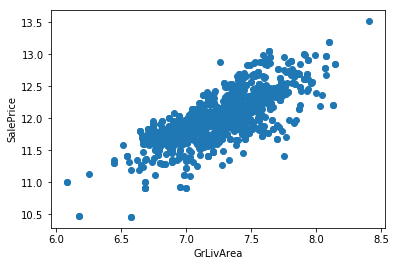

In [76]:
#scatter plot
plt.scatter(Lr_data_train['GrLivArea'], Lr_data_train['SalePrice']);
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Relationship between OverallQual and SalePrice. We use boxplot because OverallQual is a categorical variable.

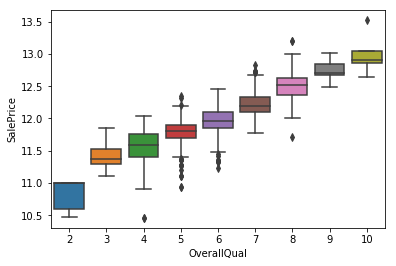

In [77]:
sns.boxplot(Lr_data_train.OverallQual,Lr_data_train.SalePrice)

Relationship between GarageCars and SalePrice.

So, all the features have a linear positive relationship with the target variable mean if one feature value increases, the other feature value also increases at a constant term.

### Modelling - LinearRegression

In [78]:
#imports used to run Multiple linear regression
from sklearn.model_selection import train_test_split


import statsmodels.api as sm

In [79]:
X_train = Lr_data_train.drop('SalePrice',axis=1)
Y_train = Lr_data_train['SalePrice']
X_test = Lr_data_test.drop('SalePrice',axis=1)
Y_test= Lr_data_test['SalePrice']

In [80]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1167, 2)
(674, 2)
(1167,)
(674,)


Fitting the Model

In [81]:
X_train = sm.add_constant(X_train)

In [82]:
model = sm.OLS(Y_train, X_train).fit()

Summary Output

In [83]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1967.
Date:                Mon, 11 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:55:50   Log-Likelihood:                 300.70
No. Observations:                1167   AIC:                            -595.4
Df Residuals:                    1164   BIC:                            -580.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.7115      0.138     55.932      

We see that all the features of our choice are statistically significant having P value 0 Which is less than the Significance level of 0.5 at a Confidence level of 95%.

All our coefficents are also positive indicating that price increases as the Predictors value increases.

For every one unit change in OverallQual, the price of the house increases by 0.1675.
For every one unit change in GrLivArea, the price of the house increases by 0.4527.


In [84]:
model.rsquared

0.77167490522388704

77% of the variance in the house price will be explained by the features of our choice.

Make Predictions and Calculating the Accuracy

### Validation - Linear Regression

In [85]:
#Imports
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn import metrics

In [86]:
predictions = model.predict(sm.add_constant(X_test))
predictions_train = model.predict(X_train)

Metrics

In [87]:
LR_test = metrics.r2_score(Y_test, predictions)
ms_error = metrics.mean_squared_error(Y_test, predictions)

In [88]:
print("R^2: {:.5f}%, MSE: {:.5f}".format(LR_test*100, ms_error))

R^2: 75.72018%, MSE: 0.04160


So, We keep 75.72% as our Baseline Accuracy. We implement different models and see how best are those models than the Multiple Linear regression.

#### Fitted Vs Residuals

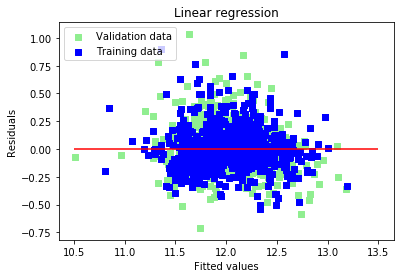

In [89]:
plt.scatter(predictions, (predictions - Y_test), c = "lightgreen", marker = "s", label = "Validation data")
plt.scatter(predictions_train, predictions_train - Y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

The error terms must have constant variance which is evident from the above plot, this is another assumption linear regression.

#### Fitted Vs Observed Values

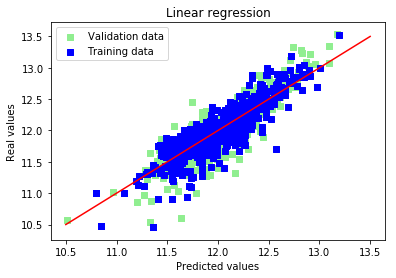

In [90]:
# Plot predictions
plt.scatter(predictions, Y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.scatter(predictions_train, Y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

So, This shows that the realtionship between the Predicted Values and Real Values is linear.

### KFold Cross Validtion

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
 
We use KFold cross validation to optimize the Multiple linear regression model. Cross-validation is a statistical method used to estimate the skill of machine learning models.
It works on the principle of dividing the data into specified number of folds which is denoted by k and train the model on k – 1 folds and validate on the remaining fold. During the process, each fold will be considered as a test set in each iteration.
We have used 10 folds to train the same training data as the one used in Multiple Linear Regression and verified on the same test data.
We see that there is a little increase in the accuracy score from the simple Multiple Linear Regression.


In [91]:
#Importing Libraries
from sklearn.model_selection import KFold

In [92]:
data_kf = Lr_data_train.drop('SalePrice', axis=1)
data_kf = data_kf.values

In [93]:
target_kf = Lr_data_train['SalePrice']
target_kf = target_kf.values

Now, perform the KFold Cross Validation, we are splitting our data into 15 splits here.

In [94]:
kf = KFold(n_splits=15)
ytests = []
ypreds = []

for train_idx, test_idx in kf.split(data_kf):
    x1_train, x1_test = data_kf[train_idx], data_kf[test_idx] #requires arrays
    y1_train, y1_test = target_kf[train_idx], target_kf[test_idx]
    
    x1_train = sm.add_constant(x1_train)
    model1 = sm.OLS(y1_train, x1_train).fit()
    y_pred = model1.predict(sm.add_constant(x1_test))
    
        
    # there is only one y-test and y-pred per iteration over the kf.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y1_test)
    ypreds += list(y_pred)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("KFold Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

KFold Cross Validation
R^2: 77.08697%, MSE: 0.03510


In [95]:
ypreds = pd.Series(ypreds)
ytests = pd.Series(ytests)

### Verification

Predicting on our split test data

In [96]:
predictions_kf = model1.predict(sm.add_constant(Lr_data_test.drop('SalePrice',axis=1)))

In [97]:
LR_kf = r2_score(Y_test, predictions_kf)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("KFold Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(LR_kf*100, ms_error))

KFold Cross Validation
R^2: 75.71675%, MSE: 0.03510


We see that the accuracy score is almost same as the simple Multiple Linear Regression.
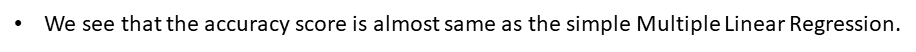

#### Fitted Vs Residual Plot

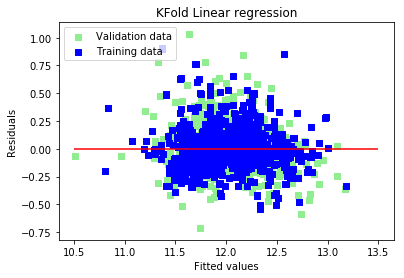

In [98]:
plt.scatter(predictions_kf, (predictions_kf - Y_test), c = "lightgreen", marker = "s", label = "Validation data")
plt.scatter(ypreds, (ypreds - ytests), c = "blue", marker = "s", label = "Training data")
plt.title("KFold Linear regression")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

#### Fitted Values Vs Observed values

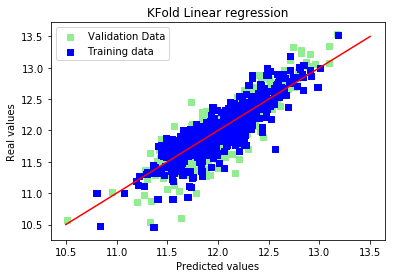

In [99]:
# Plot predictions
plt.scatter(predictions_kf, Y_test, c = "lightgreen", marker = "s", label = "Validation Data")
plt.scatter(ypreds, ytests, c = "blue", marker = "s", label = "Training data")
plt.title("KFold Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

### Ridge Regression

Ridge Regression is a regularization method for Linear regression

1. It shrinks the parameters, therefore it is mostly used to prevent multicollinearity. It works on the principle of reducing the magnitude of the coefficients.

2. It reduces the model complexity by coefficient shrinkage.

3. It uses a Hyperparameter Alpha.

Now we will assign the train_df and test_df dataset to X_train,X_test,Y_train and Y_test.

In [100]:
X_train = train_df.drop('SalePrice',axis=1)
Y_train = train_df['SalePrice']
X_test = test_df.drop('SalePrice',axis=1)
Y_test = test_df['SalePrice']

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [102]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, Y_test, scoring = scorer, cv = 10))
    return(rmse)

Best alpha : 3
Try again for more precision with alphas centered around 3
Best alpha : 3.1500000000000004
Ridge RMSE on Training set : 20032.9955426
Ridge RMSE on Test set : 27542.7046756
Ridge R2 on Training set : 0.952815720732
Ridge R2 on Test set : 0.899121970064


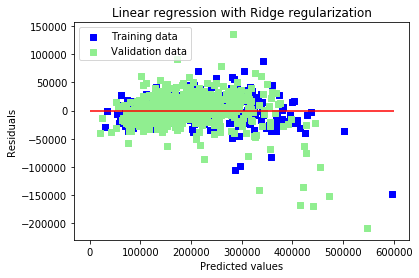

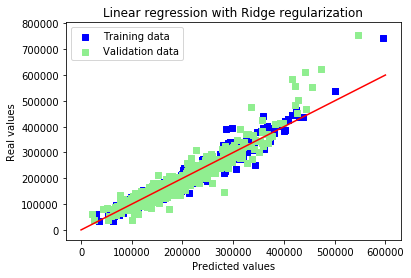

Ridge picked 211 features and eliminated the other 10 features


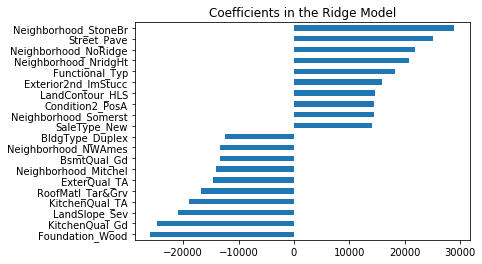

In [103]:
# Ridge
ridge = RidgeCV(alphas = [0.01, 0.02,0.03, 0.04,0.05,0.06, 0.1,0.2, 0.3, 0.4,0.5,0.6, 0.7,1, 3, 6, 10, 30, 60],cv=10)
ridge.fit(X_train, Y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * 1, alpha * .2, alpha * .25, alpha * .3, alpha * .35, alpha * .4, alpha * .45, 
                          alpha *0.6,alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, Y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

rmse_ridge_train = rmse_cv_train(ridge).mean()
rmse_ridge_test = rmse_cv_test(ridge).mean()
print("Ridge RMSE on Training set :", rmse_ridge_train)
print("Ridge RMSE on Test set :", rmse_ridge_test)
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)
score_ridge_train = metrics.r2_score(Y_train,y_train_rdg )
score_ridge_test = metrics.r2_score(Y_test,y_test_rdg )
print("Ridge R2 on Training set :", score_ridge_train)
print("Ridge R2 on Test set :", score_ridge_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - Y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - Y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 600000, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, Y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, Y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 600000], [0, 600000], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

### Lasso Regression

Lasso Regression is an another Regularization method.

1. It also works on the principle of coefficient shrinkage by using a different penalty term which is an absolute value where it is a square value in Ridge Regression.

2. It also does feature selection.

Best alpha : 3.0
Try again for more precision with alphas centered around 3.0
Best alpha : 4.2
Lasso RMSE on Training set : 20958.963688
Lasso RMSE on Test set : 28835.1857716
Ridge R2 on Training set : 0.956650197244
Ridge R2 on Test set : 0.890885024436


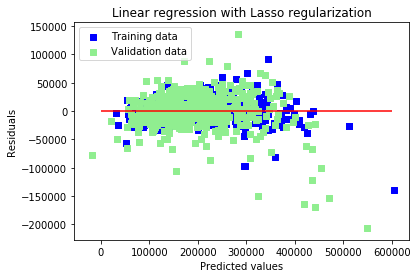

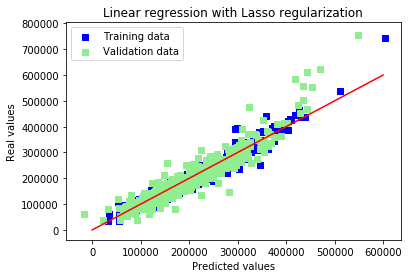

Lasso picked 193 features and eliminated the other 28 features


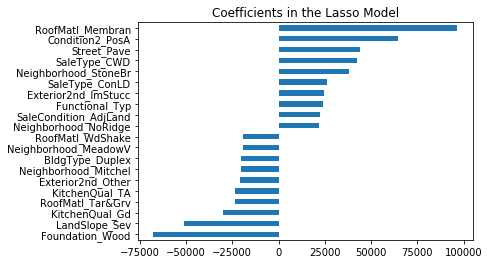

In [104]:
# Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0002,0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.15,0.16,0.2,0.25,0.3, 0.6, 1,2,3], 
                 cv = 10)
lasso.fit(X_train, Y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * 1, alpha * .2, alpha * .15, alpha * .25, alpha * .3, 
                          alpha * .35, alpha * .4, alpha * .45, alpha, alpha * .5, alpha * .6, 
                          alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                cv = 10)
lasso.fit(X_train, Y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

rmse_lasso_train = rmse_cv_train(lasso).mean()
rmse_lasso_test = rmse_cv_test(lasso).mean()
print("Lasso RMSE on Training set :", rmse_lasso_train)
print("Lasso RMSE on Test set :", rmse_lasso_test)
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)
score_lasso_train = metrics.r2_score(Y_train,y_train_las)
score_lasso_test = metrics.r2_score(Y_test,y_test_las )
print("Ridge R2 on Training set :", score_lasso_train)
print("Ridge R2 on Test set :", score_lasso_test)


# Plot residuals
plt.scatter(y_train_las, y_train_las - Y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - Y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 600000, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, Y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, Y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 600000], [0, 600000], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

### ElasticNet Regression

Best l1_ratio : 0.95
Best alpha : 0.06
Try again for more precision with l1_ratio centered around 0.95
Best l1_ratio : 0.95
Best alpha : 0.06
Now try again for more precision on alpha, with l1_ratio fixed at 0.95 and alpha centered around 0.06
Best l1_ratio : 0.95
Best alpha : 0.063
ElasticNet RMSE on Training set : 20035.7573707
ElasticNet RMSE on Test set : 27530.0953302
ElasticNet R2 on Training set : 0.952293831274
ElasticNet R2 on Test set : 0.899275235259


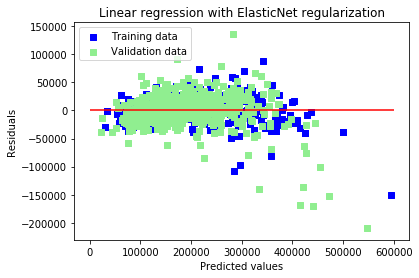

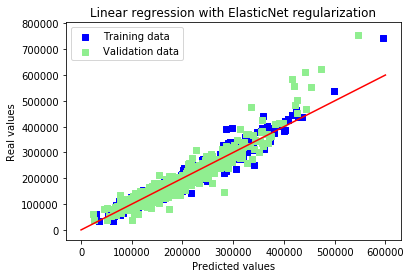

ElasticNet picked 211 features and eliminated the other 10 features


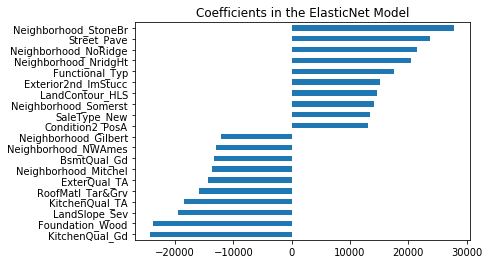

In [105]:
# ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                           cv = 10)
elasticNet.fit(X_train, Y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, Y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                         cv = 10)
elasticNet.fit(X_train, Y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )


rmse_elasticnet_train = rmse_cv_train(elasticNet).mean()
rmse_elasticnet_test = rmse_cv_test(elasticNet).mean()
print("ElasticNet RMSE on Training set :", rmse_elasticnet_train)
print("ElasticNet RMSE on Test set :", rmse_elasticnet_test)
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)
EN_score_train = metrics.r2_score(Y_train,y_train_ela)
EN_score_test = metrics.r2_score(Y_test,y_test_ela )
print("ElasticNet R2 on Training set :", EN_score_train)
print("ElasticNet R2 on Test set :", EN_score_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - Y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - Y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 600000, color = "red")
plt.show()

# Plot predictions
plt.scatter( y_train_ela,Y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter( y_test_ela,Y_test,c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 600000], [0, 600000], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()


### Random Forest

Random Forest is a supervised learning algorithm. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result.

Random forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

In [106]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [107]:
# Instantiate model with 1100 decision trees
rf = RandomForestRegressor(n_estimators = 1100, random_state = 23)

In [108]:
# Train the model on training data
rf.fit(X_train, Y_train);

In [109]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

In [110]:
predictions_train = rf.predict(X_train)

In [111]:
# Calculate the absolute errors
errors = abs(predictions - Y_test)

In [112]:
# Print out the mean absolute error (mae)
mae_RF_test = round(np.mean(errors), 2)
print('Mean Absolute Error:', mae_RF_test)

Mean Absolute Error: 19099.94


In [113]:
#Print Root mean squared error
rmse_rf_train = np.sqrt(metrics.mean_squared_error(Y_train,predictions_train))
rmse_rf_test = np.sqrt(metrics.mean_squared_error(Y_test,predictions))
print("Root mean square error of train set :",rmse_rf_train)
print("Root mean square error of train set :",rmse_rf_test)

Root mean square error of train set : 7761.40783526
Root mean square error of train set : 30283.534805


In [114]:
score_RF_test = r2_score(Y_test, predictions)
score_RF_test

0.86924372299250374

In [115]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

In [116]:
# Sort the feature importances by most important first
importances = sorted(importances, reverse = True)

In [117]:
#display first 10 features
importances = pd.Series(importances)
importances = importances.head(10)

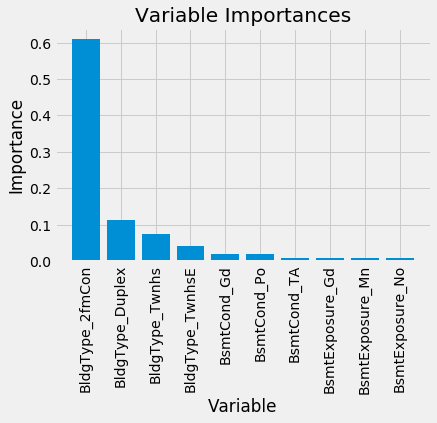

In [118]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X_train.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Visualizing the Tree

In [119]:
#Import tools needed for visualization
from sklearn.tree import export_graphviz
import graphviz

In [120]:
#Pull out one tree from the forest
tree = rf.estimators_[6]

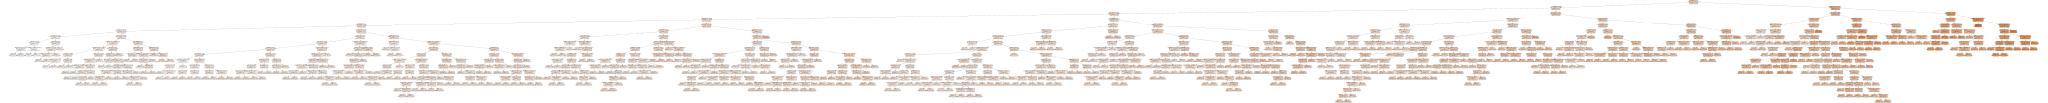

In [121]:
#Export the image to a dot file 
dot_data = export_graphviz(tree, out_file = None,feature_names=list(X_train.columns),rounded = True,precision=1, filled= True)
graphviz.Source(dot_data)

In [122]:
np.unique(predictions)

array([  65884.71636364,   71085.42      ,   79698.70454545,
         80172.75818182,   80438.32727273,   80506.35090909,
         84242.00363636,   84432.08363636,   84541.28272727,
         87065.44818182,   88746.27272727,   88871.02909091,
         89901.80727273,   90967.75454545,   91605.27727273,
         92374.12181818,   92755.10636364,   93531.48454545,
         93852.23181818,   93860.27363636,   94355.52363636,
         95531.44909091,   95808.20181818,   95911.75      ,
         96484.99454545,   98007.82272727,   98410.35090909,
         98473.50909091,   99055.44      ,   99490.30636364,
         99649.74909091,   99712.36636364,   99802.23363636,
        100885.38636364,  101292.10545455,  101550.46818182,
        102492.95545455,  103005.33636364,  104213.86363636,
        104706.78727273,  104718.24      ,  104848.17636364,
        104889.94272727,  104926.15181818,  105147.93636364,
        105316.28818182,  105683.12727273,  106013.78727273,
        106274.60363636,

In [124]:
from pydotplus import graph_from_dot_data

In [125]:
graph = graph_from_dot_data(dot_data)

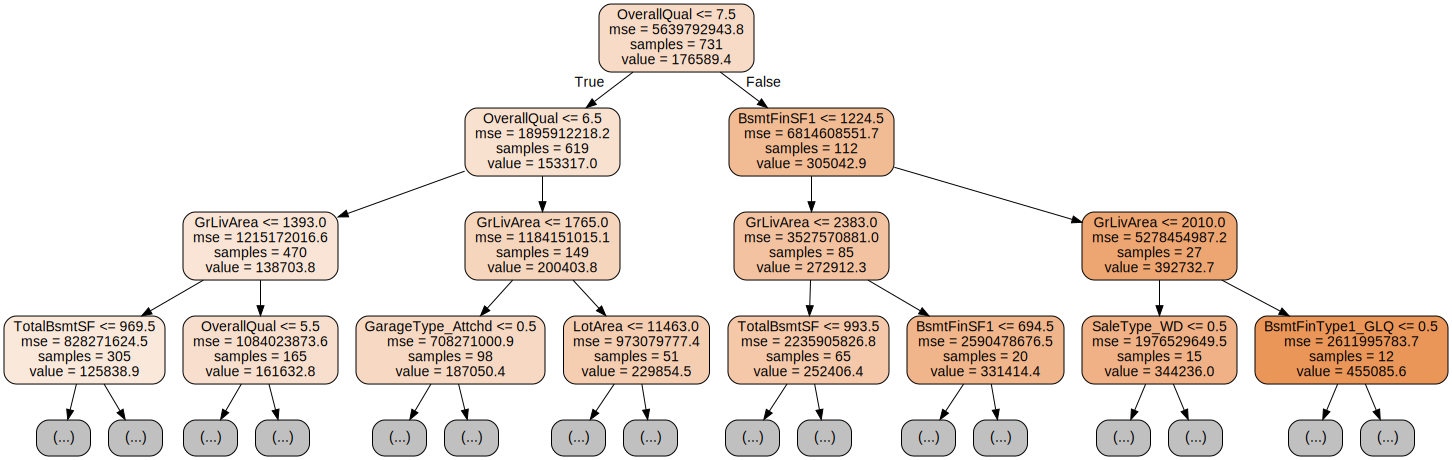

In [126]:
#Export the image to a dot file 
dot_data1 = export_graphviz(tree,max_depth = 3, out_file = None,feature_names=list(X_train.columns),rounded = True,precision=1, filled= True)
graphviz.Source(dot_data1)

### HyperParameter Tuning

Hyperparameter Tuning is providing different combinations of parameters randomly to tune the algorithm to its maximum power i.e., accuracy and check the best hyperparameters at which the accuracy score is high.

Hyperparameters are different from Model Parameters.

In [127]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [128]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 40.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

Best Parameters

In [129]:
rf_random.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1600}

Metrics

In [130]:
def evaluate(model, X_test, Y_test):
    predictions = model.predict(X_test)
    predictions_rf_train = model.predict(X_train)
    accuracy = r2_score(Y_test,predictions)
    print('Model Performance')
    print('Average Error: ',round(np.mean(errors),2))
    print('Root mean square error of test set :', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))
    print('Root mean square error of train set :', np.sqrt(metrics.mean_squared_error(Y_train,predictions_rf_train)))
    print("Accuracy = ", accuracy)
    
    return accuracy
best_random = rf_random.best_estimator_
score_RF_HP_test = evaluate(best_random, X_test, Y_test)

Model Performance
Average Error:  19099.94
Root mean square error of test set : 30417.7809817
Root mean square error of train set : 7885.6173599
Accuracy =  0.868081874643


The results are almost similar with basic Random Forest.

### XGBoost

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [131]:
import xgboost as xgb

Now we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 

In [132]:
data_dmatrix = xgb.DMatrix(data=final_data.drop('SalePrice',axis=1),label=final_data['SalePrice'])

Some of the Tuning Parameters of XGBoost

learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

max_depth: determines how deeply each tree is allowed to grow during any boosting round.

subsample: percentage of samples used per tree. Low value can lead to underfitting.

colsample_bytree: percentage of features used per tree. High value can lead to overfitting.

n_estimators: number of trees you want to build.

objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability

The next step is to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the XGBClassifier() class.


In [133]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',n_estimators=5000,max_depth = 150)

Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods

In [135]:
xg_reg.fit(X_train,Y_train)

preds = xg_reg.predict(X_test)

Metrics

In [136]:
score_XG_test = metrics.r2_score(Y_test, preds)
rmse_XG_test = np.sqrt(metrics.mean_squared_error(Y_test, preds))
print("R^2: {:.5f}%, MSE: {:.5f}".format(score_XG_test*100, rmse_XG_test))

R^2: 87.42648%, MSE: 29696.39591


### Comparing the Models

In [151]:
Accuracy_Scores = {'scores': [LR_test,LR_kf,EN_score_test,score_XG_test,score_ridge_test,score_lasso_test,score_RF_test,score_RF_HP_test]}
Accuracy_Scores = pd.DataFrame(Accuracy_Scores, index = ['LR_test','LR_kf','EN_score_test','score_XG_test', 'score_ridge_test','score_lasso_test','score_RF_test','score_RF_HP_test'])
Accuracy_Scores.index = ['LRt','LR_Kf','EN','XG','ridge','lasso','RF','RF_HP']
Accuracy_Scores

,scores
LRt,0.757202
LR_Kf,0.757168
EN,0.899275
XG,0.874265
ridge,0.899122
lasso,0.890885
RF,0.869244
RF_HP,0.868082


<BarContainer object of 8 artists>

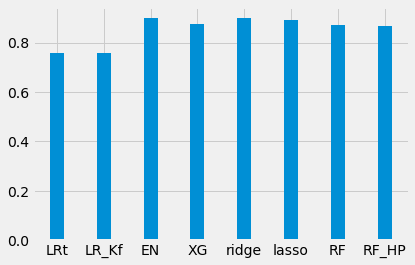

In [152]:
plt.bar(Accuracy_Scores.index,Accuracy_Scores['scores'], width = 0.3)

Though all models are perfect in estimating the target Variable, XGBoost showed the highest accuracy in predicting the variable.

So, we will predict the prices of the houses in our test data unsing XGBoost model

### Predicting the House Prices

Preprocessing the test data

In [156]:
Predictions = elasticNet.predict(output.drop('SalePrice',axis=1))

In [157]:
output['SalePrice'] = Predictions

In [158]:
export_csv = output.to_csv (r'C:\Users\nishanda\Desktop\STUDY\PGPDM\UC - Advanced Analytics and Machine Learning\export_dataframe.csv', index = None, header=True) 